In [1]:
import pandas as pd
import numpy as np
import networkx as nx




In [5]:
# tsv是用制表符，csv是用逗号
data = pd.read_csv("seealsology-data.tsv", delimiter='\t')
    

In [6]:
data

,source,target,depth
0,life insurance,corporate-owned life insurance,1
1,life insurance,critical illness insurance,1
2,life insurance,economic capital,1
3,life insurance,estate planning,1
4,life insurance,false insurance claims,1
...,...,...,...
3739,health system,two-tier health care,4
3740,health system,universal health care,4
3741,health administration,master of health administration,4
3742,health administration,nosokinetics,4


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


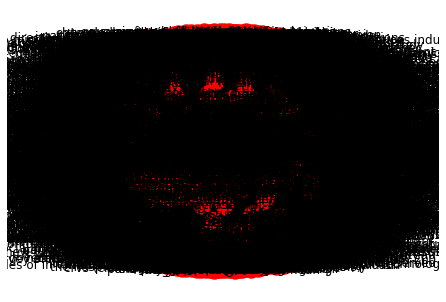

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
G = nx.DiGraph()
length = len(data)
for i in range(length):
    G.add_edge(data['source'][i], data['target'][i])
layout = nx.spring_layout(G)
nx.draw(G, pos=layout, with_labels=True, hold = False)
plt.show()

In [16]:
import random
def get_randomwalk(node, path_length):
    random_walk = [node]
    for i in range(path_length-1):
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break
        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node        
    return random_walk
print(get_randomwalk('life insurance', 10))


['life insurance', 'term life insurance', 'universal life insurance']


In [37]:
from tqdm import tqdm
# 从图获取所有节点的列表
all_nodes = list(G.nodes())
# 捕获数据集中所有节点的随机游走序列
random_walks = []
for n in tqdm(all_nodes):
	# 每个节点游走5次，每次最长距离为10
    for i in range(5):
        random_walks.append(get_randomwalk(n,10))
# 输出随机游走序列，及序列个数
print(random_walks)
print(len(random_walks))


100%|██████████| 2399/2399 [00:00<00:00, 26823.06it/s]

[['life insurance', 'corporate-owned life insurance', 'h. h. holmes', 'insurance fraud', 'united states postal inspection service', 'diplomatic security service', 'parliamentary and diplomatic protection'], ['life insurance', 'false insurance claims', 'united states postal inspection service', 'mobile mail-screening station'], ['life insurance', 'corporate-owned life insurance', 'h. h. holmes', 'insurance fraud', 'split billing'], ['life insurance', 'return of premium life insurance'], ['life insurance', 'segregated fund', 'unitised insurance fund', 'unit linked insurance plan'], ['corporate-owned life insurance', 'h. h. holmes', 'insurance fraud', 'florida division of insurance fraud'], ['corporate-owned life insurance', 'h. h. holmes', 'insurable interest', 'property insurance'], ['corporate-owned life insurance', 'h. h. holmes', 'insurance fraud', 'horse murders'], ['corporate-owned life insurance', 'h. h. holmes', 'insurable interest', 'life insurance', 'estate planning', 'probate'

In [38]:
# 使用skip-gram，提取模型学习到的权重
from gensim.models import Word2Vec
# 训练skip-gram (word2vec)模型
model = Word2Vec(window = 4, sg = 1, hs = 0,
                 negative = 10, # 负采样
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)
# 从random_walks中创建词汇表
model.build_vocab(random_walks, progress_per=2)
model.train(random_walks, total_examples = model.corpus_count, epochs=20, report_delay=1)
print(model)
# 输出和critical illness insurance相似的
print(model.similar_by_word('critical illness insurance'))


Word2Vec(vocab=2399, size=100, alpha=0.03)
[('whole life insurance', 0.9996637105941772), ('term life insurance', 0.9996606111526489), ('insurance in the united states', 0.9996563792228699), ('variable universal life insurance', 0.9996373057365417), ('general insurance', 0.9995599985122681), ('segregated fund', 0.9995393753051758), ('insurance', 0.9995323419570923), ('internal revenue code section 79', 0.9994455575942993), ('economic capital', 0.9994326233863831), ('return of premium life insurance', 0.999426007270813)]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  del sys.path[0]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


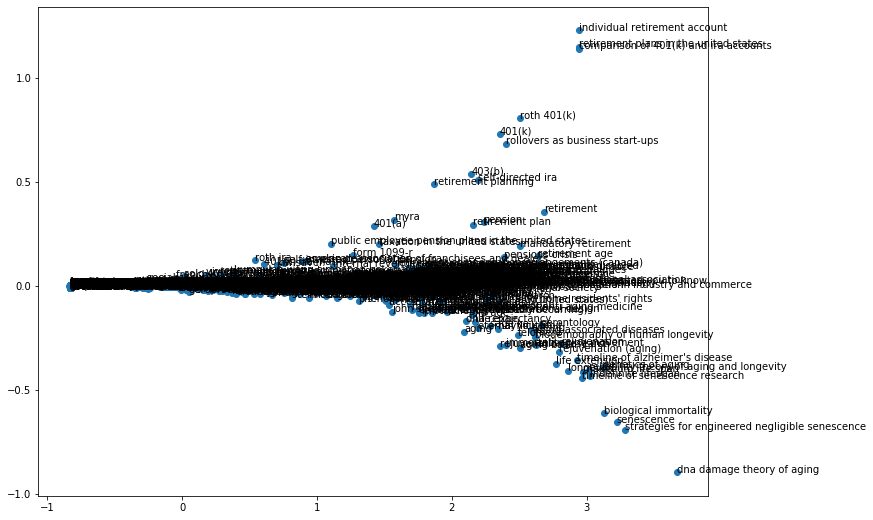

In [40]:
from sklearn.decomposition import PCA
# 在二维空间中绘制所选节点的向量
def plot_nodes(word_list):
    X = model[word_list]
    #print(type(X))
    # 将100维向量减少到2维
    pca = PCA(n_components=2)
    result = pca.fit_transform(X) 
    #print(result)
    # 绘制节点向量
    plt.figure(figsize=(12,9))
    # 创建一个散点图的投影
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))        
    plt.show()
# 将所有的embedding进行绘制
plot_nodes(model.wv.vocab)


In [28]:
data['source'].unique()

array(['life insurance', 'segregated fund', 'term life insurance',
       'retirement plan', 'life expectancy', 'pet insurance',
       'unitised insurance fund', 'roth 401(k)',
       'universities superannuation scheme', 'infant mortality',
       'self-directed ira', 'uk pensions', 'perinatal mortality',
       'uk labour law', 'stillbirth', 'miscarriage',
       'individual retirement account', 'rollovers as business start-ups',
       'internal revenue service', 'form 1099-r', '401(k)',
       'rejuvenation (aging)', 'comparison of 401(k) and ira accounts',
       '403(b)', 'longevity', 'therapeutic cloning', 'tissue engineering',
       'timeline of senescence research', 'telomerase', 'senescence',
       'research into centenarians',
       'reliability theory of aging and longevity', 'oldest viable seed',
       'mitohormesis', 'maximum life span', 'longevity myths',
       'life extension', 'hayflick limit', 'gerontology research group',
       'indefinite lifespan', 'genetics

In [30]:
list(G.neighbors('life insurance'))

['corporate-owned life insurance',
 'critical illness insurance',
 'economic capital',
 'estate planning',
 'false insurance claims',
 'general insurance',
 'internal revenue code section 79',
 'life expectancy',
 'pet insurance',
 'retirement plan',
 'return of premium life insurance',
 'segregated fund',
 "servicemembers' group life insurance",
 'term life insurance',
 'tontine']

In [34]:
get_randomwalk('life insurance', 10)

['life insurance',
 'general insurance',
 'outstanding claims reserves',
 'actuarial science',
 'actuarial exam']